<a href="https://colab.research.google.com/github/A-R-M-028/Customer-Segmentation-Using-KMean-Hierarchical-Clustering/blob/main/D46_Customer_Segmentation_Using_KMean_%26_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# For Category to num, Normalization, Standardrization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Importing the Dataset

In [76]:
df = pd.read_csv("/content/drive/MyDrive/Projects/ML/marketing_campaign.csv", sep='\t')

# EDA: (DE, DM, DC, DV)

In [77]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Seperated by tab -> Fixed in dataset

In [78]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [79]:
df.shape

(2240, 29)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [81]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [82]:
df.duplicated().sum()

0

In [83]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [84]:
# ID
df.drop('ID', axis = 1, inplace = True)

In [85]:
# Year_Birth
# Convert Birth to Age

In [86]:
df['Age'] = 2023 - df['Year_Birth']

In [87]:
# Dynamic change
import datetime

In [88]:
df['Age'] = datetime.date.today().year -  df['Year_Birth']

In [89]:
datetime.date.today().year

2023

In [90]:
df[['Age']]

,Age
0,66
1,69
2,58
3,39
4,42
...,...
2235,56
2236,77
2237,42
2238,67


In [91]:
df.drop('Year_Birth', axis = 1, inplace = True)

In [92]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,66
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,69


In [93]:
# Education
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [94]:
# Undergraduate -> 'Graduation', '2n Cycle', 'Basic'
# Postgraduate -> 'Master', 'PhD'

In [95]:
df.Education.replace(['Graduation', '2n Cycle', 'Basic', 'Master', 'PhD'],['Undergraduate', 'Undergraduate', 'Undergraduate', 'Postgraduate','Postgraduate'], inplace = True)

In [96]:
df.Education.value_counts()

Undergraduate    1384
Postgraduate      856
Name: Education, dtype: int64

In [97]:
enc = LabelEncoder()

In [98]:
df.Education = enc.fit_transform(df.Education)

In [99]:
df.Education.value_counts()

1    1384
0     856
Name: Education, dtype: int64

In [100]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,66
1,1,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,69


In [103]:
# Marital_Status
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [104]:
# Alone -> 'Single', 'Divorced', 'Widow', 'Absurd', 'YOLO'
# Partner -> 'Married ', 'Together'

In [105]:
df.Marital_Status.replace(['Single', 'Divorced', 'Widow', 'Absurd', 'YOLO', 'Married', 'Together'],['Alone', 'Alone', 'Alone', 'Alone', 'Alone', 'Partner', 'Partner'], inplace = True)

In [106]:
df.Marital_Status.value_counts()

Partner    1444
Alone       796
Name: Marital_Status, dtype: int64

In [107]:
df.Marital_Status = enc.fit_transform(df.Marital_Status)

In [108]:
df.Marital_Status.value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [109]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,0,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,66
1,1,0,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,69


In [ ]:
# Income
# Null value present

In [114]:
# Mean
print(df.Income.mean())
# Median
print(df.Income.median())
# Mode
print(df.Income.mode())

52247.25135379061
51381.5
0    7500.0
Name: Income, dtype: float64


In [116]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

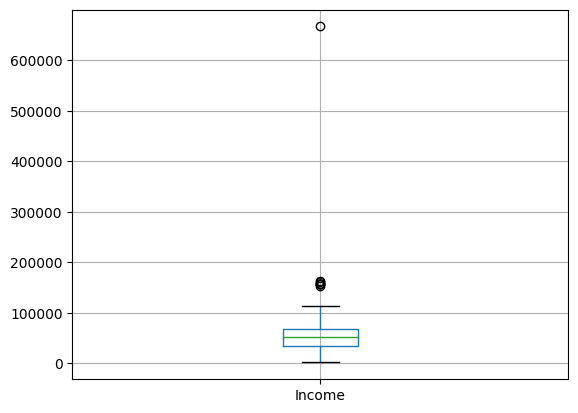

In [118]:
df[['Income']].boxplot()

In [120]:
df.Income.fillna(df.Income.median(), inplace = True)

In [122]:
df.Income.isna().sum()

0

In [ ]:
# Sort out the outliers using z-test (Best to use), can follow IQR
# Formula -> (x−mean)/sd
# About 68% of the data falls within 1 standard deviation of the mean.
# About 95% of the data falls within 2 standard deviations of the mean.
# About 99.7% of the data falls within 3 standard deviations of the mean.

In [126]:
in_mean = df.Income.mean()
in_std = df.Income.std()
threshold = 3
outliers = []

In [127]:
for i in df.Income:
  z = (i - in_mean) / in_std
  if z > threshold:
    outliers.append(i)

In [128]:
outliers

[157243.0,
 162397.0,
 153924.0,
 160803.0,
 157733.0,
 157146.0,
 156924.0,
 666666.0]

*We cant perform remove outliers as I cant say that income is very large is a false data, not good choice to perform to remove outliers by any test*

<Axes: >

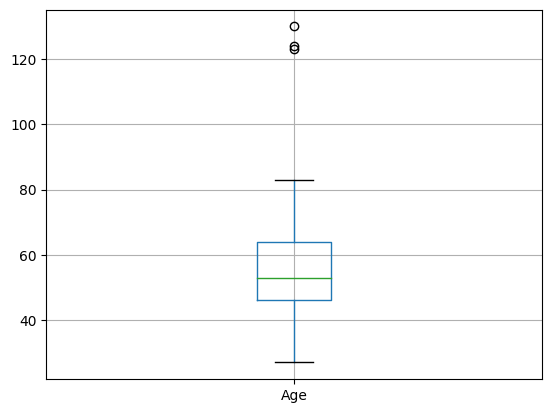

In [129]:
# Age -> Outliers
df[['Age']].boxplot()

In [130]:
df.Age.describe()
# Max -> 130

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [131]:
age_mean = df.Age.mean()
age_std = df.Age.std()
threshold = 3
age_outliers = []

In [132]:
for i in df.Age:
  age_z = (i - age_mean ) / age_std
  if age_z > threshold:
    age_outliers.append(i)

In [133]:
age_outliers
# You picture you can see 123,  124 Overlaping, 130 in last

[123, 130, 124]

In [135]:
int(df.Age.median())

53

In [137]:
# Replace with that
df.Age.replace(age_outliers, [int(df.Age.median()), int(df.Age.median()), int(df.Age.median())], inplace = True)

<Axes: >

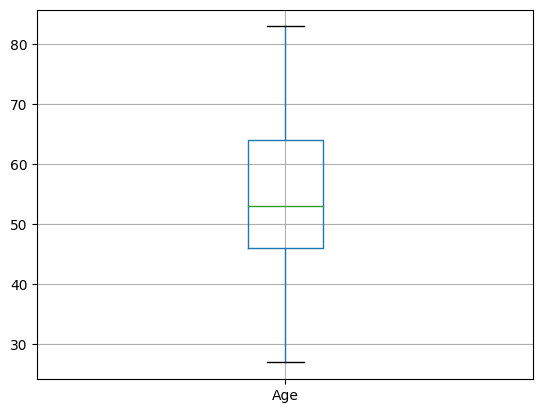

In [138]:
df[['Age']].boxplot()
# No outlies now

In [140]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,0,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,66
1,1,0,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,69


In [141]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age'],
      dtype='object')

In [ ]:
# Kidhome Teenhome -> ChildHome
# 0 1 1 1

In [142]:
df['ChildHome'] = df.Kidhome + df.Teenhome

In [143]:
df.ChildHome

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: ChildHome, Length: 2240, dtype: int64

In [145]:
df.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [146]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildHome
0,1,0,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,66,0
1,1,0,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,69,2
2,1,1,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,58,0
3,1,1,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,39,1
4,0,1,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,42,1


In [ ]:
# Dt_Customer -> Joining date of the customer
# Suitable datatype -> Timestamp
# Converting to age

In [148]:
pd.DatetimeIndex(df.Dt_Customer).year

<ipython-input-148-56b4096ab740>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.DatetimeIndex(df.Dt_Customer).year


Int64Index([2012, 2014, 2013, 2014, 2014, 2013, 2012, 2013, 2013, 2014,
            ...
            2013, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2012],
           dtype='int64', name='Dt_Customer', length=2240)

In [151]:
datetime.date.today().year

2023

In [152]:
df.Dt_Customer = datetime.date.today().year - pd.DatetimeIndex(df.Dt_Customer).year

<ipython-input-152-e6a174bb6edf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Dt_Customer = datetime.date.today().year - pd.DatetimeIndex(df.Dt_Customer).year


In [153]:
df.Dt_Customer

0       11
1        9
2       10
3        9
4        9
        ..
2235    10
2236     9
2237     9
2238     9
2239    11
Name: Dt_Customer, Length: 2240, dtype: int64

In [154]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildHome
0,1,0,58138.0,11,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,66,0
1,1,0,46344.0,9,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,69,2
2,1,1,71613.0,10,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,58,0
3,1,1,26646.0,9,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,39,1
4,0,1,58293.0,9,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,42,1


In [155]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'ChildHome'],
      dtype='object')

In [ ]:
# Amount of purchase to single col
# 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',  'MntSweetProducts', 'MntGoldProds'


In [156]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [158]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',  'MntSweetProducts', 'MntGoldProds'], axis = 1, inplace = True)

In [161]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'ChildHome', 'Spent'],
      dtype='object')

In [ ]:
# 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
# Convert to Purchase col

In [162]:
df['Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [163]:
df.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis = 1, inplace = True)

In [164]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'ChildHome', 'Spent', 'Purchase'],
      dtype='object')

In [166]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildHome,Spent,Purchase
0,1,0,58138.0,11,58,7,0,0,0,0,0,0,3,11,1,66,0,1617,25
1,1,0,46344.0,9,38,5,0,0,0,0,0,0,3,11,0,69,2,27,6
2,1,1,71613.0,10,26,4,0,0,0,0,0,0,3,11,0,58,0,776,21
3,1,1,26646.0,9,26,6,0,0,0,0,0,0,3,11,0,39,1,53,8
4,0,1,58293.0,9,94,5,0,0,0,0,0,0,3,11,0,42,1,422,19


In [168]:
df.Purchase.value_counts()

7     149
5     145
4     128
6     123
17    116
9     102
19    101
16    101
21     95
8      94
22     94
20     94
23     87
10     80
18     79
15     74
12     70
25     68
26     67
11     67
24     56
14     55
13     44
27     39
28     35
29     19
32     12
30     11
31     11
1       4
0       4
33      4
34      4
2       3
37      1
39      1
35      1
43      1
44      1
Name: Purchase, dtype: int64

In [ ]:
# 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',   'AcceptedCmp1', 'AcceptedCmp2'
# This is cat value cant modify anything

In [ ]:
# 'Z_CostContact',  'Z_Revenue'
# No need here

In [169]:
df.drop(['Z_CostContact',  'Z_Revenue'], axis = 1, inplace = True)

In [170]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ChildHome,Spent,Purchase
0,1,0,58138.0,11,58,7,0,0,0,0,0,0,1,66,0,1617,25
1,1,0,46344.0,9,38,5,0,0,0,0,0,0,0,69,2,27,6
2,1,1,71613.0,10,26,4,0,0,0,0,0,0,0,58,0,776,21
3,1,1,26646.0,9,26,6,0,0,0,0,0,0,0,39,1,53,8
4,0,1,58293.0,9,94,5,0,0,0,0,0,0,0,42,1,422,19


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   int64  
 1   Marital_Status     2240 non-null   int64  
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   int64  
 4   Recency            2240 non-null   int64  
 5   NumWebVisitsMonth  2240 non-null   int64  
 6   AcceptedCmp3       2240 non-null   int64  
 7   AcceptedCmp4       2240 non-null   int64  
 8   AcceptedCmp5       2240 non-null   int64  
 9   AcceptedCmp1       2240 non-null   int64  
 10  AcceptedCmp2       2240 non-null   int64  
 11  Complain           2240 non-null   int64  
 12  Response           2240 non-null   int64  
 13  Age                2240 non-null   int64  
 14  ChildHome          2240 non-null   int64  
 15  Spent              2240 non-null   int64  
 16  Purchase           2240 

# Feature Scaling (Under Feature Selection)
### Perform Standarization:
To bring range to -> 0 to 1 (Deal with Outliers), Bring range to smaller range
<br>
Formula -> (x - min()) / max() - min()

In [172]:
scaler = MinMaxScaler()

In [173]:
# Dataset after scaling
scaler_df = scaler.fit_transform(df)
# All transformed

In [174]:
scaler_df[0]

array([1.        , 0.        , 0.08483222, 1.        , 0.58585859,
       0.35      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.69642857, 0.        ,
       0.63968254, 0.56818182])

In [177]:
df.iloc[0]
# See the difference

Education                1.0
Marital_Status           0.0
Income               58138.0
Dt_Customer             11.0
Recency                 58.0
NumWebVisitsMonth        7.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Complain                 0.0
Response                 1.0
Age                     66.0
ChildHome                0.0
Spent                 1617.0
Purchase                25.0
Name: 0, dtype: float64

In [179]:
ssd = [] # Sum of square mean (Each value of k)
for i in range(1, 11):
  k_model = KMeans(n_clusters =  i, n_init = 15, max_iter = 500) # Hyper param tuning
  k_model.fit(df)
  ssd.append(k_model.inertia_)

In [180]:
ssd

[1404441816032.506,
 681176782394.304,
 326107469057.04846,
 183331827990.79675,
 124214326117.83951,
 82920002122.2987,
 53617671205.24406,
 40868352124.82439,
 31131678594.974274,
 24202315126.22957]

Text(0.5, 1.0, 'Elbow Plot')

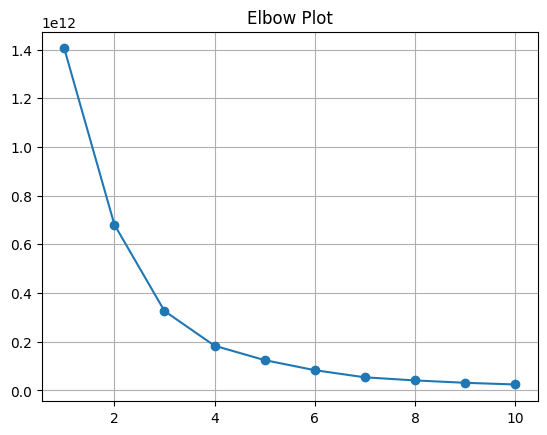

In [181]:
plt.plot(range(1, 11), ssd, marker = 'o')
plt.grid()
plt.title('Elbow Plot')

In [ ]:
# k = 6 (Let)

In [186]:
kModel = KMeans(n_clusters = 6)

In [187]:
kModel.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [188]:
predict = kModel.predict(df)

In [189]:
predict[:10]

array([3, 0, 1, 5, 3, 3, 3, 0, 5, 5], dtype=int32)

In [190]:
df['Cluster'] = predict

In [191]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ChildHome,Spent,Purchase,Cluster
0,1,0,58138.0,11,58,7,0,0,0,0,0,0,1,66,0,1617,25,3
1,1,0,46344.0,9,38,5,0,0,0,0,0,0,0,69,2,27,6,0
2,1,1,71613.0,10,26,4,0,0,0,0,0,0,0,58,0,776,21,1
3,1,1,26646.0,9,26,6,0,0,0,0,0,0,0,39,1,53,8,5
4,0,1,58293.0,9,94,5,0,0,0,0,0,0,0,42,1,422,19,3


In [192]:
# Hierarchycal Clustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [193]:
var = linkage(df, method = 'ward')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [23.75, 23.75, 63.75, 63.75],
  [5.0, 5.0, 43.75, 43.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [135.0, 135.0, 161.875, 161.875],
  [120.0, 120.0, 148.4375, 148.4375],
  [100.0, 100.0, 134.21875, 134.21875],
  [24.375, 24.375, 117.109375, 117.109375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [290.0, 290.0, 314.375, 

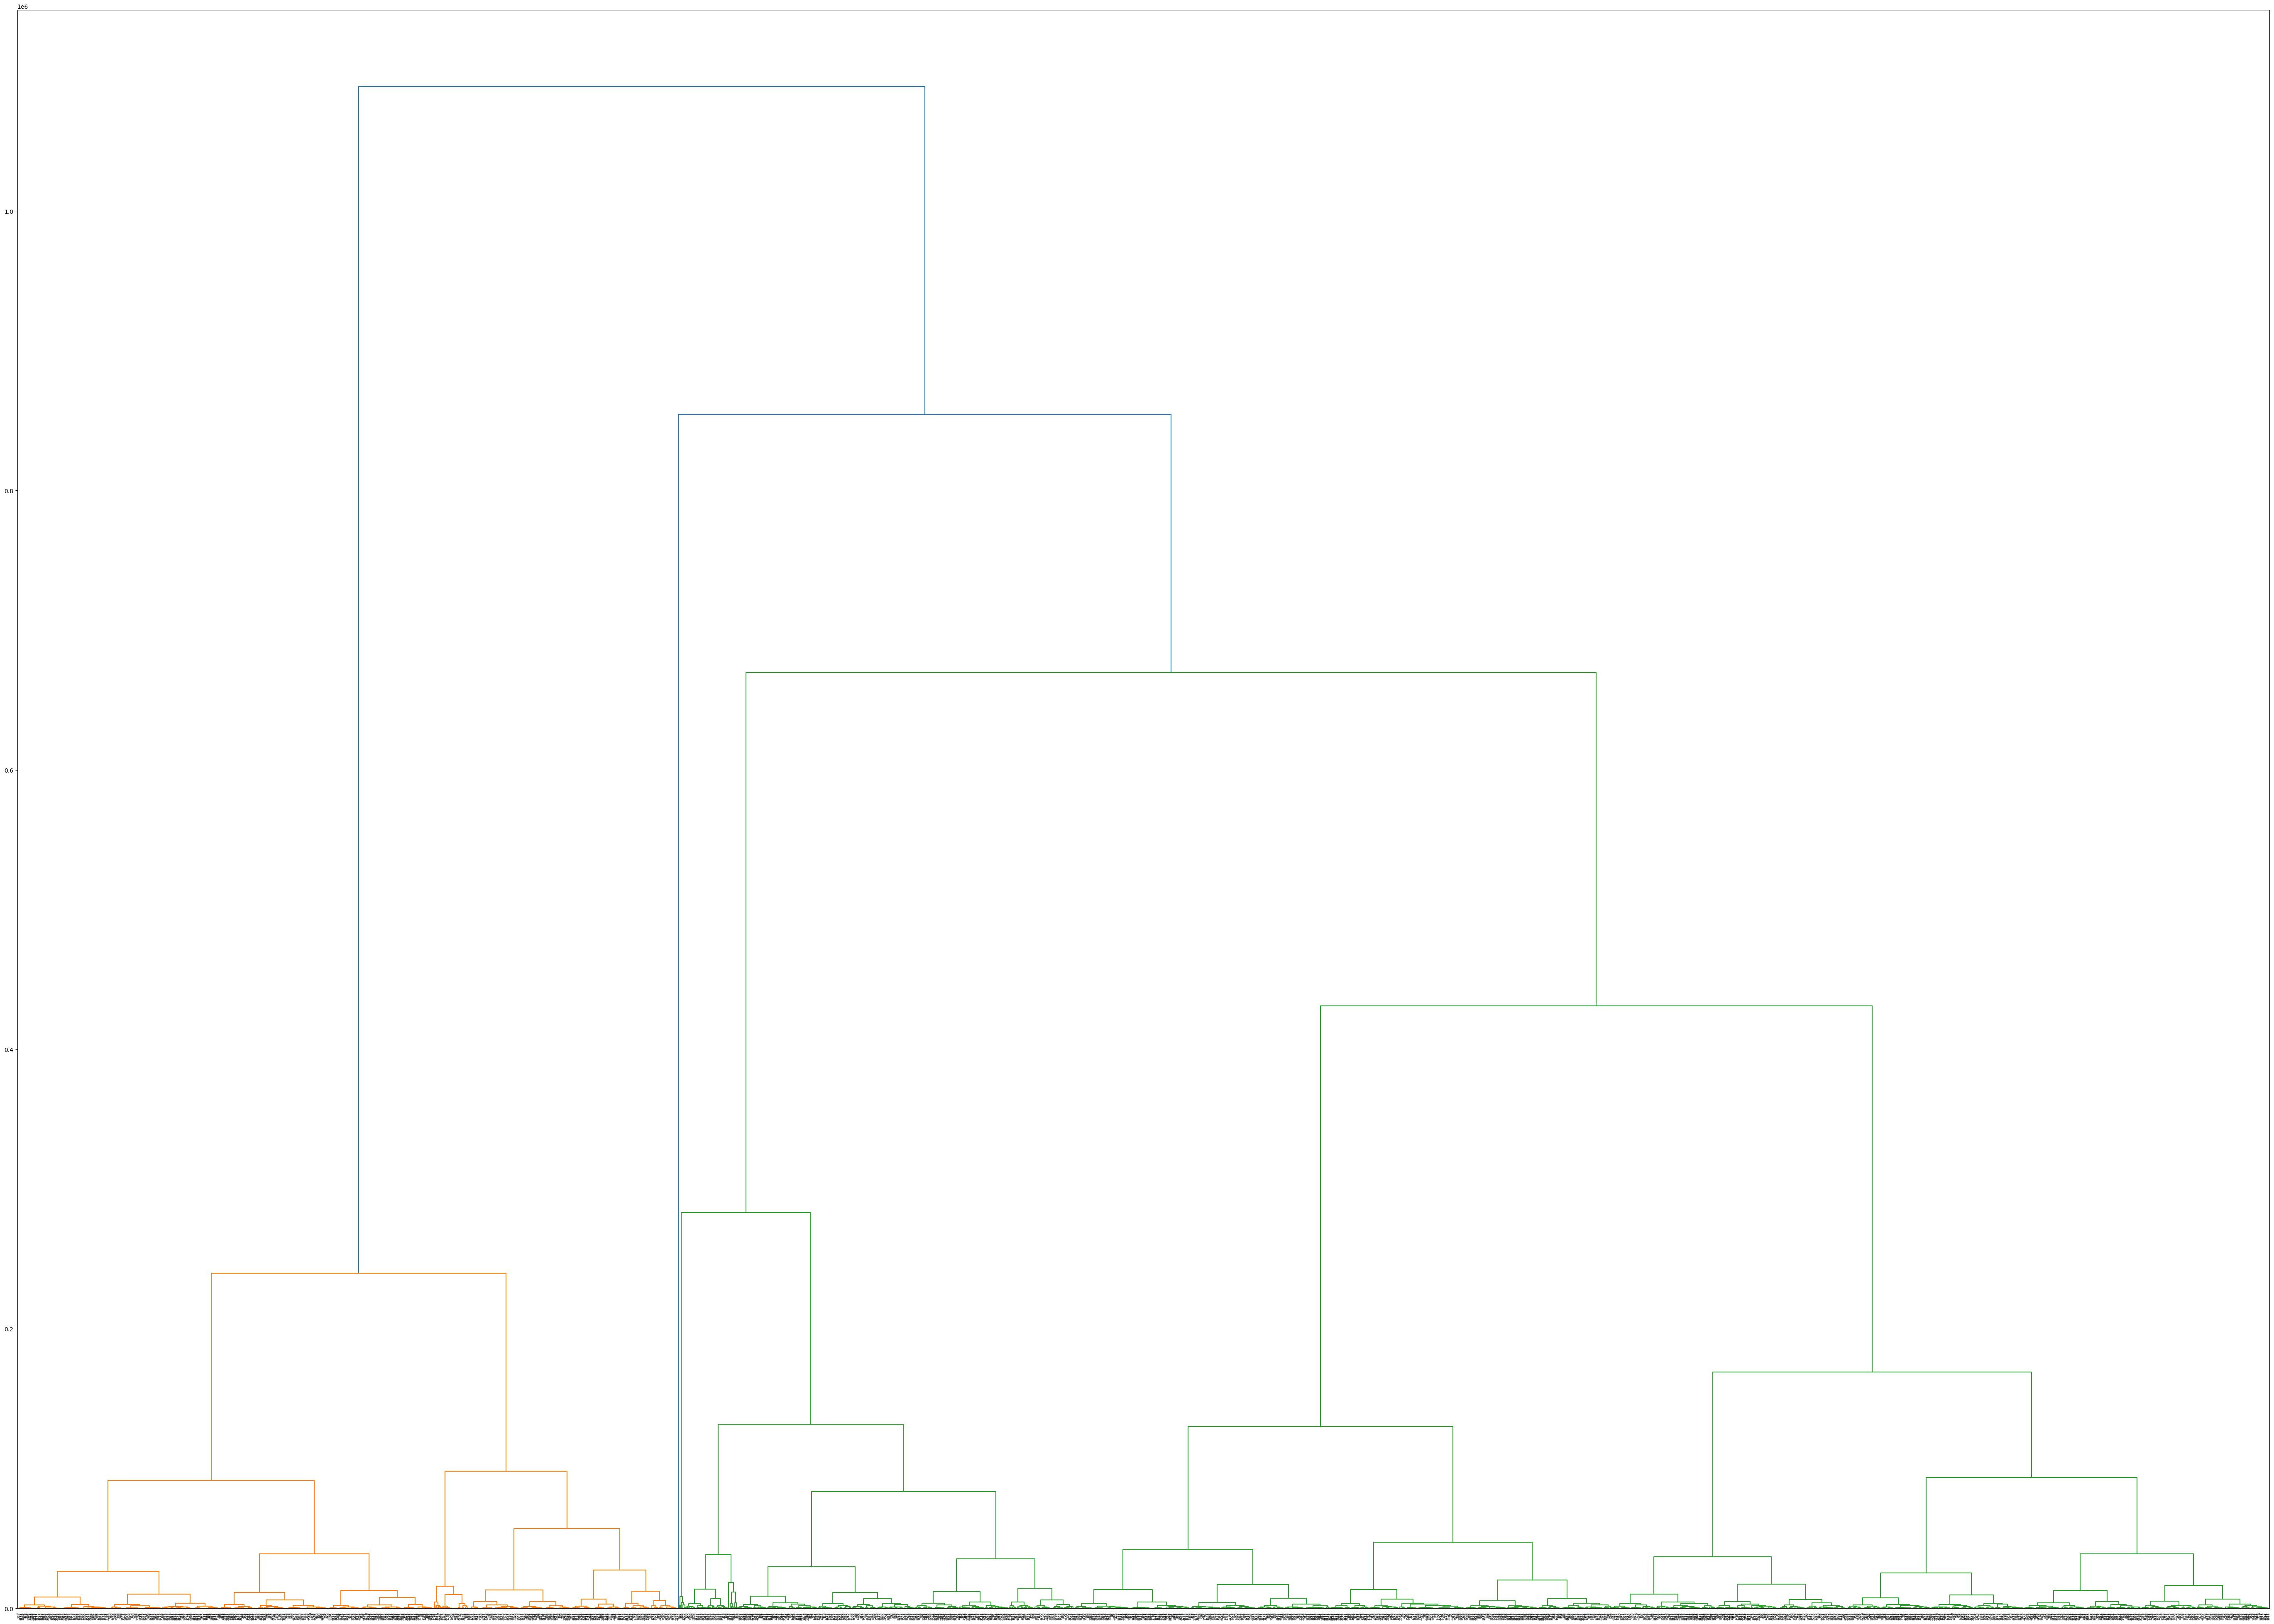

In [194]:
plt.figure(figsize = (70, 50))
dendrogram(var, leaf_rotation = 90)